In [64]:
import sqlite3
import matplotlib.pyplot as plt
import json
import pandas as pd 
import seaborn as sns

# Correct path — creates file in current directory
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

cursor.executemany("""
INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
""", [
    ("USB-C Cable", 10, 9.99),
    ("USB-C Cable", 5, 9.99),
    ("Wireless Mouse", 7, 25.50),
    ("Mechanical Keyboard", 3, 79.99),
    ("Learning SQL Book", 4, 29.99),
    ("Coffee Maker", 2, 99.00)
])

conn.commit()
conn.close()

print("Database created successfully!")


# Query
# query = """SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product"""
# df = pd.read_sql_query(query, conn)

Database created successfully!


<Figure size 640x480 with 0 Axes>

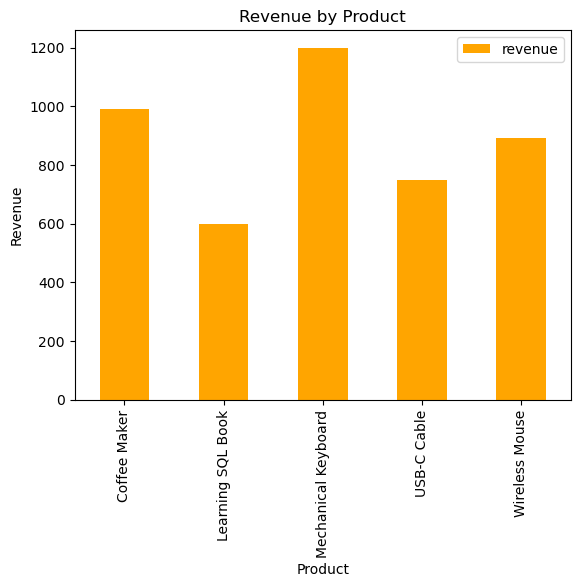

In [73]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Get data
query = """
SELECT product, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)

# Plot
plt.figure()
df.plot(kind='bar', x='product', y='revenue', color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.savefig("sales_chart.png")  # Saves in current folder
plt.show()

conn.close()


In [66]:
notebook = {
    "cells": [
        {
            "cell_type": "code",
            "metadata": {},
            "source": [
                "import sqlite3\n",
                "import pandas as pd\n",
                "import matplotlib.pyplot as plt\n",
                "\n",
                "conn = sqlite3.connect('sales_data.db')\n",
                "query = \"SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product\"\n",
                "df = pd.read_sql_query(query, conn)\n",
                "print(df)\n",
                "df.plot(kind='bar', x='product', y='revenue')\n",
                "plt.show()\n",
                "conn.close()\n"
            ],
            "outputs": [],
            "execution_count": None
        }
    ],
    "metadata": {},
    "nbformat": 4,
    "nbformat_minor": 5
}


In [67]:
nb_path = r"C:\Users\manju\OneDrive\Desktop\Internship\sales_analysis.ipynb"

with open(nb_path, "w") as f:
    json.dump(notebook, f)


print("Notebook saved successfully:", nb_path)

Notebook saved successfully: C:\Users\manju\OneDrive\Desktop\Internship\sales_analysis.ipynb
